In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

### Train

In [2]:
train = pd.read_csv('../ml-data/cyberattack_detection/3_selected_features/A1_train_data_TV.csv', sep=',')

In [4]:
train.head()

,Duration,TotalPackets,TotalBytes,SourceBytes,Protocol_tcp,Protocol_udp,Direction_->,Direction_<->,DestTypeService_-1.0,DestTypeService_0.0
0,-0.140416,-0.008024,-0.008615,-0.003897,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.248682,-0.010103,-0.008919,-0.004151,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.248682,-0.010363,-0.008918,-0.004149,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.248682,-0.010363,-0.008917,-0.004151,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.248682,-0.010623,-0.008919,-0.004149,1.0,0.0,1.0,0.0,1.0,0.0


In [5]:
# set isolation = 0.01
isolation_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01,max_features=1.0)

In [6]:
isolation_forest.fit(train)

IsolationForest(contamination=0.01)

In [18]:
train_predict = isolation_forest.predict(train)

In [19]:
train['anomaly'] = train_predict

In [20]:
train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,anomaly
0,-0.003880,-0.461098,-1.188942,0.018107,0.541963,-0.010794,0.041620,0.055149,-0.000330,-0.001358,1
1,-0.007473,-0.599533,-1.519159,0.029847,-0.639408,-0.415963,-0.237650,-0.437798,-0.011286,-0.048951,1
2,-0.007635,-0.599531,-1.519159,0.029929,-0.639408,-0.415963,-0.237650,-0.437794,-0.011471,-0.048951,1
3,-0.007636,-0.599531,-1.519159,0.029927,-0.639408,-0.415963,-0.237650,-0.437794,-0.011472,-0.048951,1
4,-0.007799,-0.599529,-1.519160,0.030010,-0.639407,-0.415962,-0.237651,-0.437789,-0.011656,-0.048951,1


In [21]:
train['anomaly'].value_counts()

 1    13743297
-1      138738
Name: anomaly, dtype: int64

### Test

In [8]:
test = pd.read_csv('../ml-data/cyberattack_detection/3_selected_features/A1_test_data_TV.csv', sep=',')

In [9]:
test.head()

,Duration,TotalPackets,TotalBytes,SourceBytes,Protocol_tcp,Protocol_udp,Direction_->,Direction_<->,DestTypeService_-1.0,DestTypeService_0.0
0,5.727052,0.010949,-0.007308,-0.001807,1.0,0.0,1.0,0.0,0.0,1.0
1,5.083170,0.009130,-0.007336,-0.001802,1.0,0.0,1.0,0.0,0.0,1.0
2,5.281135,0.011209,-0.007299,-0.001890,1.0,0.0,1.0,0.0,0.0,1.0
3,5.502734,0.013548,-0.006943,-0.001699,1.0,0.0,1.0,0.0,0.0,1.0
4,5.224429,0.009650,-0.007310,-0.002012,1.0,0.0,1.0,0.0,0.0,1.0


In [10]:
test_predict = isolation_forest.predict(test)

In [11]:
test['anomaly'] = test_predict

In [12]:
test['anomaly'].value_counts()

 1    1042265
-1      11580
Name: anomaly, dtype: int64

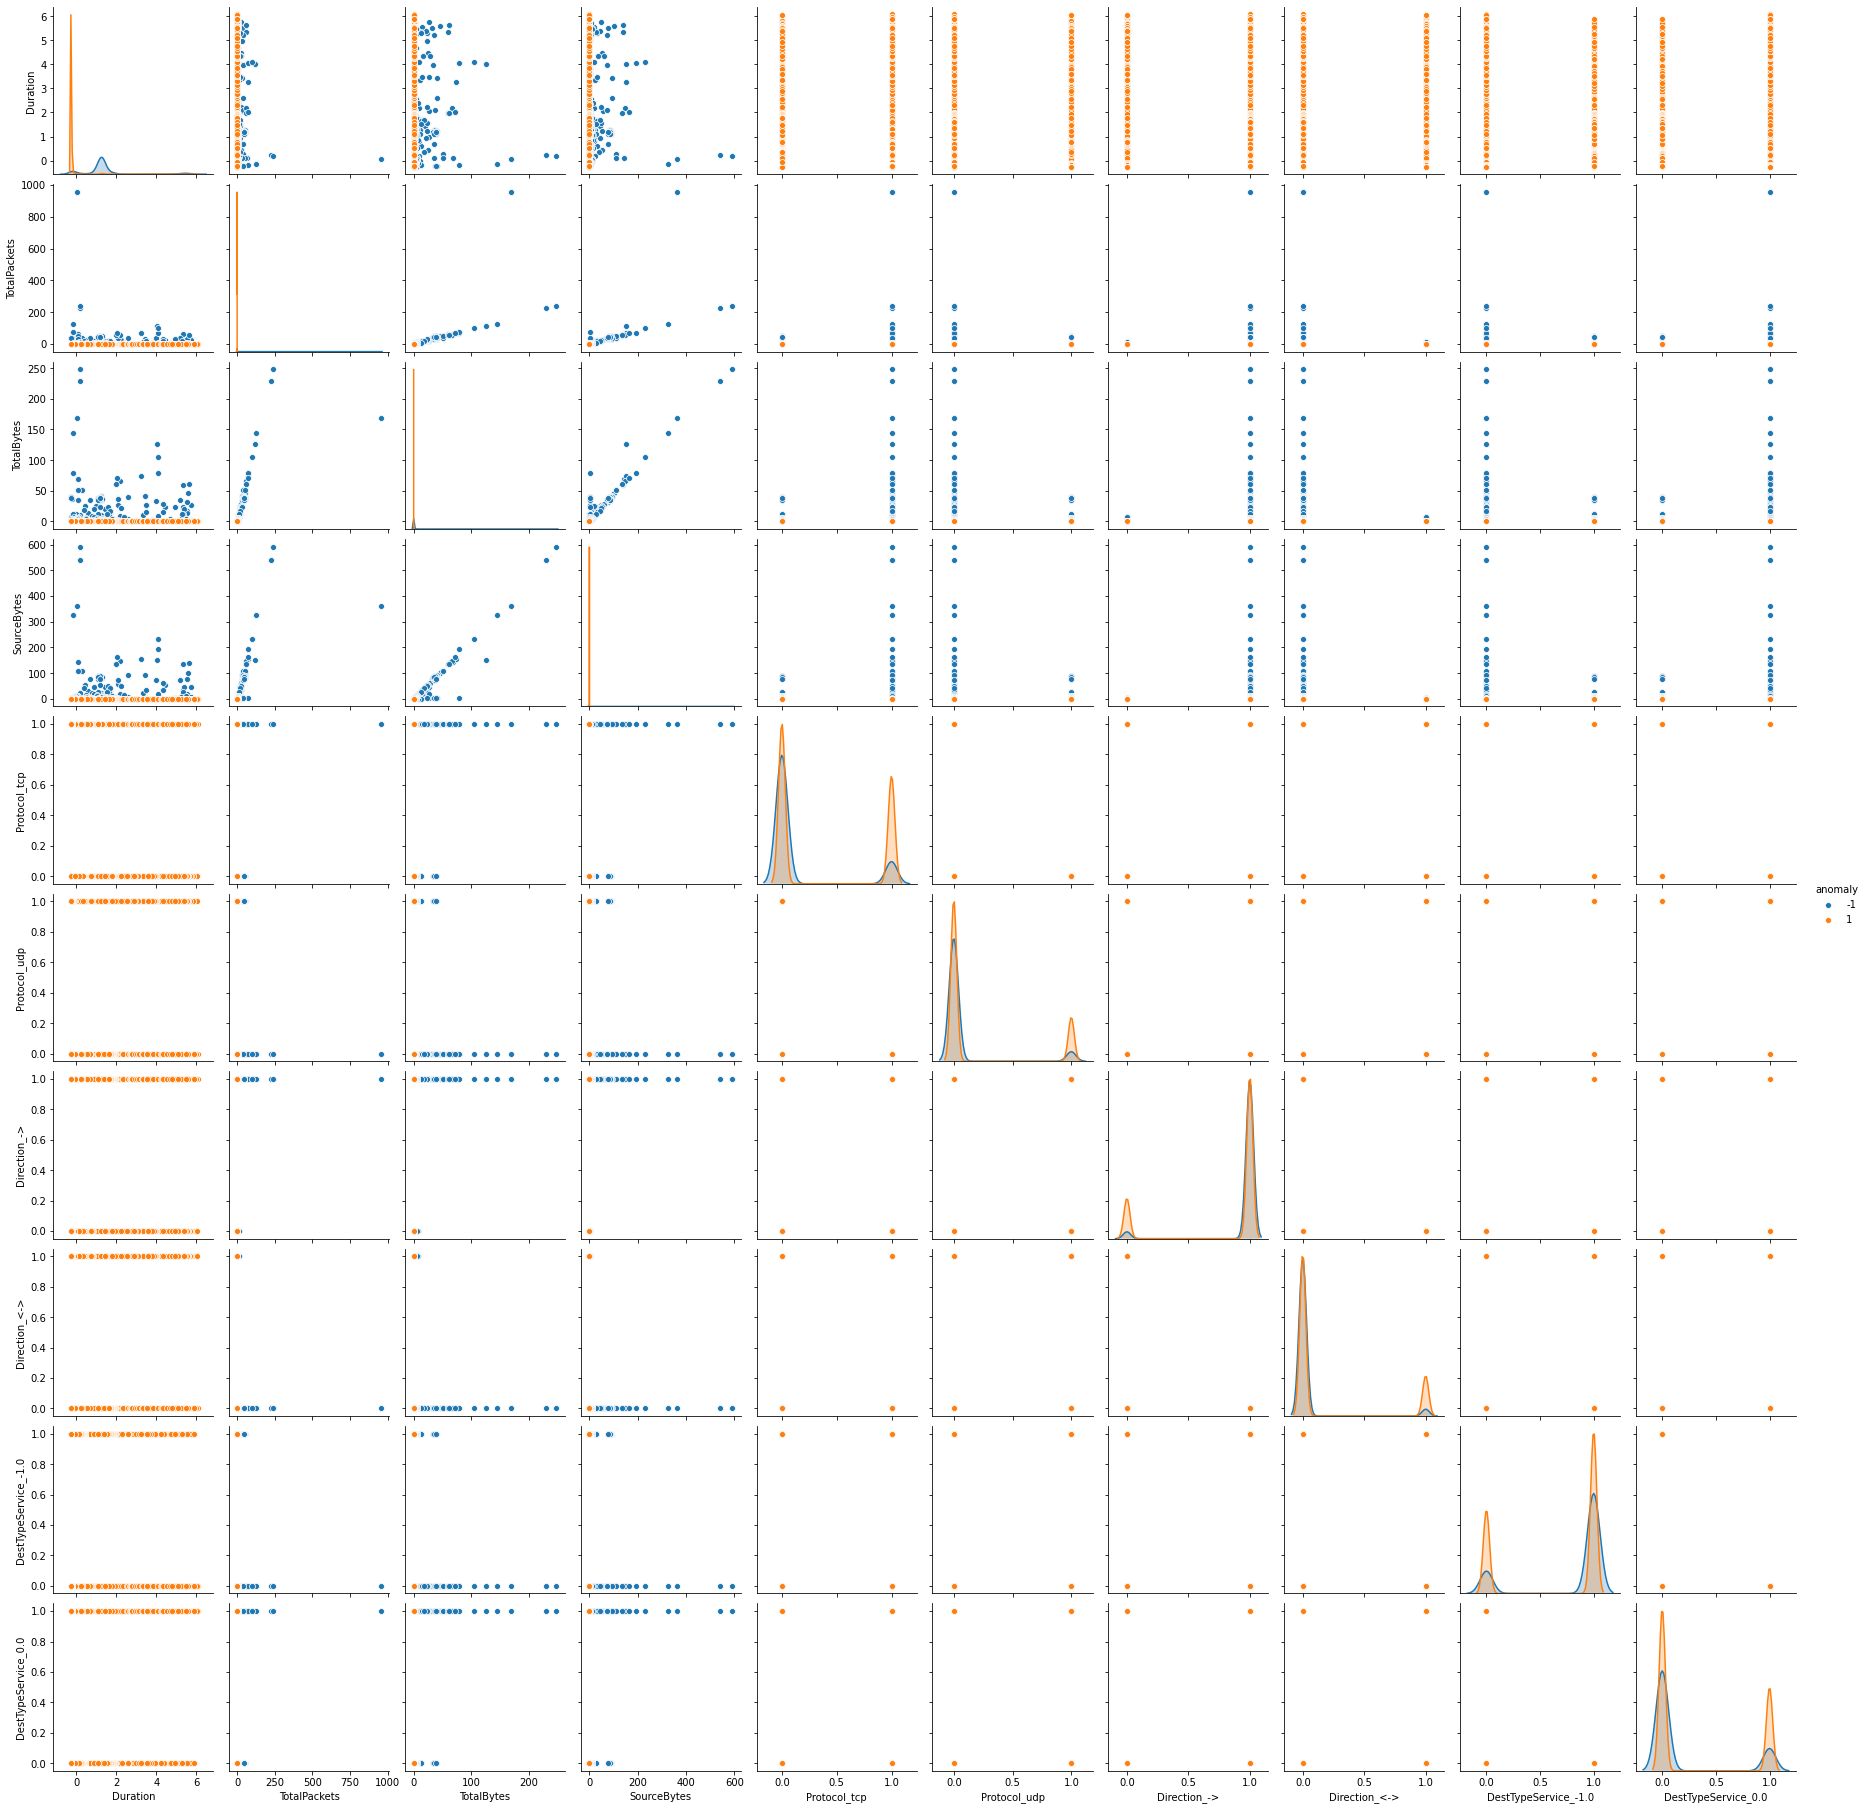

In [13]:
sns.pairplot(test, hue = 'anomaly')

In [14]:
anomalies = test.loc[test['anomaly'] == -1]

In [15]:
anomalies.head()

,Duration,TotalPackets,TotalBytes,SourceBytes,Protocol_tcp,Protocol_udp,Direction_->,Direction_<->,DestTypeService_-1.0,DestTypeService_0.0,anomaly
12,5.453153,0.016667,-0.006707,-0.001879,1.0,0.0,0.0,1.0,0.0,1.0,-1
29,5.760441,0.177809,0.008249,0.022155,1.0,0.0,1.0,0.0,0.0,1.0,-1
33,5.791808,0.060591,0.002755,0.000900,1.0,0.0,0.0,1.0,0.0,1.0,-1
35,5.342381,0.092560,0.005278,0.018370,1.0,0.0,1.0,0.0,0.0,1.0,-1
39,5.373719,0.132066,0.007298,0.010765,1.0,0.0,0.0,1.0,0.0,1.0,-1


In [16]:
anomalies.to_csv('predictions/A1_test_iForest_TV.csv', sep=',')

In [18]:
original_test = pd.read_csv('../ml-data/cyberattack_detection/1_raw_data/A2_1/test_data', sep=','
                       ,names=['Timestamp','Duration','Protocol','SrcIPAddress','SrcPort','Direction',
                               'DestIPAddress','DestPort','State','SrcTypeService','DestTypeService',
                               'TotalPackets','TotalBytes','SourceBytes'])

In [19]:
anomalies_orig_feat = original_test[original_test.index.isin(anomalies.index)]

In [20]:
anomalies_orig_feat.head(10)

,Timestamp,Duration,Protocol,SrcIPAddress,SrcPort,Direction,DestIPAddress,DestPort,State,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes
12,2012/12/01 07:41:14.864878,3539.406554,tcp,138.11.74.16,6667,<?>,201.30.94.155,1027,PA_PA,0.0,0.0,106,8477,3832
29,2012/12/01 13:11:28.851831,3730.155481,tcp,223.123.73.31,49160,<?>,138.29.91.235,22,PA_A,0.0,0.0,726,65410,43750
33,2012/12/01 13:12:22.527609,3749.626366,tcp,178.50.91.161,51440,<?>,167.44.36.221,5190,PA_PA,0.0,0.0,275,44498,8447
35,2012/12/01 13:12:28.147391,3470.644866,tcp,200.231.81.55,1049,<?>,230.72.91.222,13363,PA_PA,0.0,0.0,398,54101,37464
39,2012/12/01 13:12:41.413006,3490.098237,tcp,178.50.91.161,51444,<?>,162.183.3.133,143,PA_PA,0.0,0.0,550,61790,24832
249,2012/12/01 13:34:30.899435,1.850078,tcp,153.217.92.157,1040,->,207.177.143.150,5678,FSPA_FSPA,0.0,0.0,1528,1201775,33613
1829,2012/12/01 14:11:29.044873,3664.463491,tcp,223.123.73.31,49160,<?>,138.29.91.235,22,PA_A,0.0,0.0,707,68145,43414
1871,2012/12/01 14:12:29.621949,3508.240697,tcp,136.87.165.89,12541,<?>,230.72.91.222,13363,PA_PA,0.0,0.0,176,21103,14178
1873,2012/12/01 14:12:35.989767,3582.235642,tcp,200.231.81.55,1049,<?>,230.72.91.222,13363,PA_PA,0.0,0.0,366,53766,33783
1909,2012/12/01 14:13:01.598907,3639.017926,tcp,178.50.91.161,51444,<?>,162.183.3.133,143,PA_PA,0.0,0.0,518,59351,23754


In [21]:
anomalies_orig_feat.to_csv('predictions/A1_test_iForest_TV_orig_feat.csv', sep=',')